In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df.head()



,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [3]:
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


In [4]:
df.isnull().sum()


house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


KeyError: 'OrderDate'

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns



Index(['house_type', 'locality', 'city', 'area', 'beds', 'bathrooms',
       'balconies', 'furnishing', 'area_rate', 'rent'],
      dtype='object')

In [8]:
df.columns


Index(['house_type', 'locality', 'city', 'area', 'beds', 'bathrooms',
       'balconies', 'furnishing', 'area_rate', 'rent'],
      dtype='object')

In [9]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [10]:
df['rent_per_bed'] = df['rent'] / df['beds']


In [11]:
city_rent = df.groupby('city')['rent'].mean().sort_values(ascending=False)
city_rent

city
Mumbai       103226.538104
Bangalore     56709.260894
New Delhi     41309.158739
Pune          32077.928612
Nagpur        18015.784874
Name: rent, dtype: float64

In [12]:
house_type_rent = df.groupby('house_type')['rent'].mean()
house_type_rent


house_type
1 BHK Flat for Rent in 2nd Block Rajajinagar, Bangalore                       15000.0
1 BHK Flat for Rent in 7th Heaven, Dhanori, Pune                              20000.0
1 BHK Flat for Rent in Aaditya Glory II, Godhani, Nagpur                       6000.0
1 BHK Flat for Rent in Abhimaan Homes, Shirgaon, Pune                         25000.0
1 BHK Flat for Rent in Abhyudaya Nagar, Mumbai                                18000.0
                                                                               ...   
> 10 BHK Flat for Rent in Lakkasandra Extension, Wilson Garden, Bangalore    180000.0
> 10 BHK House for Rent in Dwarka New Delhi                                  130000.0
> 10 BHK House for Rent in Greater Kailash Enclave 1 New Delhi               850000.0
> 10 BHK House for Rent in Lonikand Pune                                      40000.0
> 10 BHK Villa for Rent in Safdarjung Enclave New Delhi                      750000.0
Name: rent, Length: 5467, dtype: float64

In [13]:
furnishing_rent = df.groupby('furnishing')['rent'].mean()
furnishing_rent


furnishing
Furnished         73651.662086
Semi-Furnished    57112.619603
Unfurnished       40469.801277
Name: rent, dtype: float64

In [14]:
df[['area', 'rent']].corr()


,area,rent
area,1.000000,0.433513
rent,0.433513,1.000000


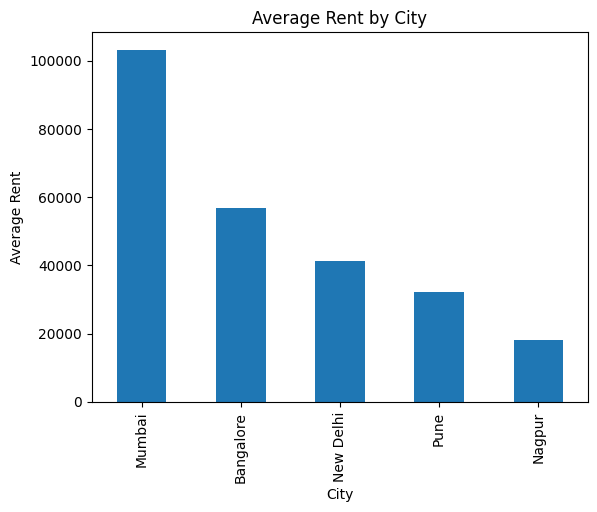

In [15]:
city_rent.plot(kind='bar')
plt.title("Average Rent by City")
plt.xlabel("City")
plt.ylabel("Average Rent")
plt.show()


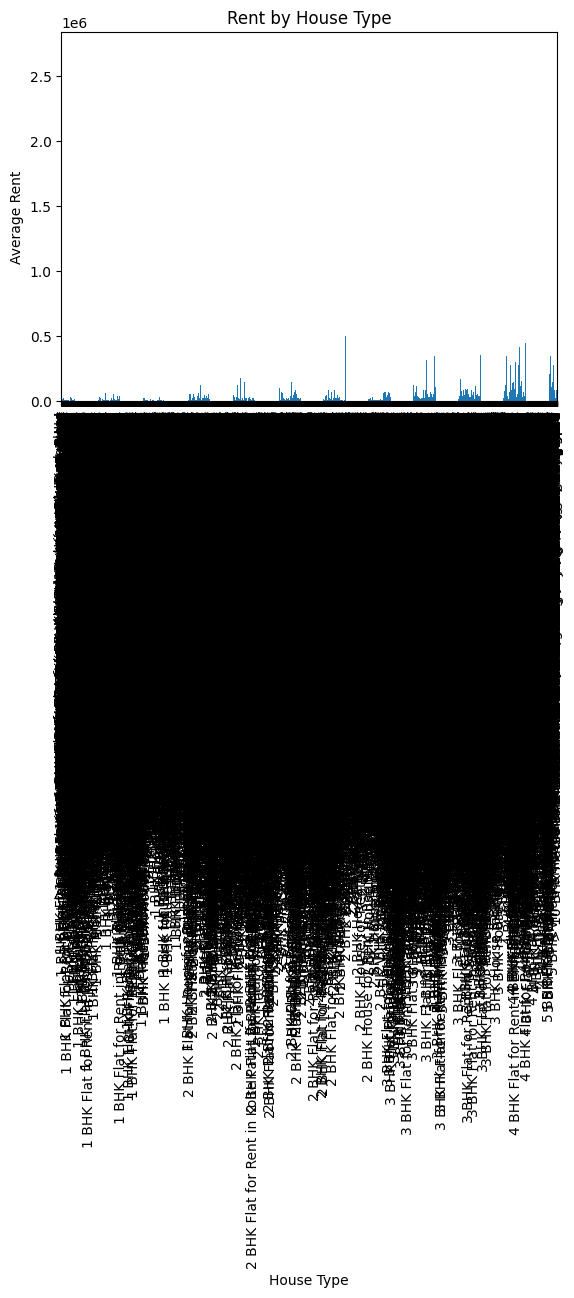

In [18]:
house_type_rent.plot(kind='bar')
plt.title("Rent by House Type")
plt.xlabel("House Type")
plt.ylabel("Average Rent")
plt.show()


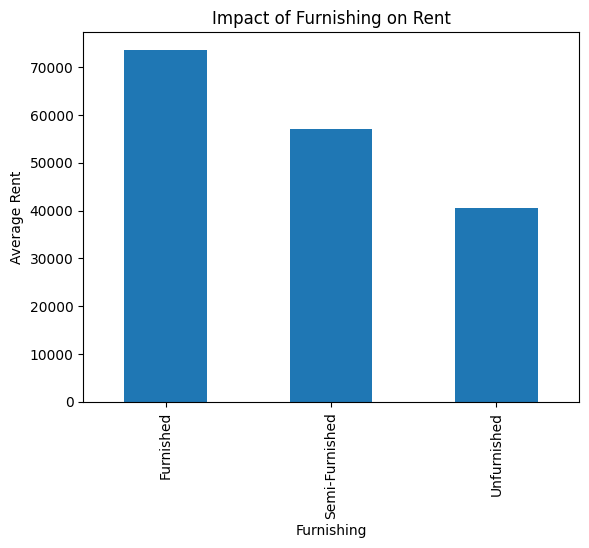

In [17]:
furnishing_rent.plot(kind='bar')
plt.title("Impact of Furnishing on Rent")
plt.xlabel("Furnishing")
plt.ylabel("Average Rent")
plt.show()


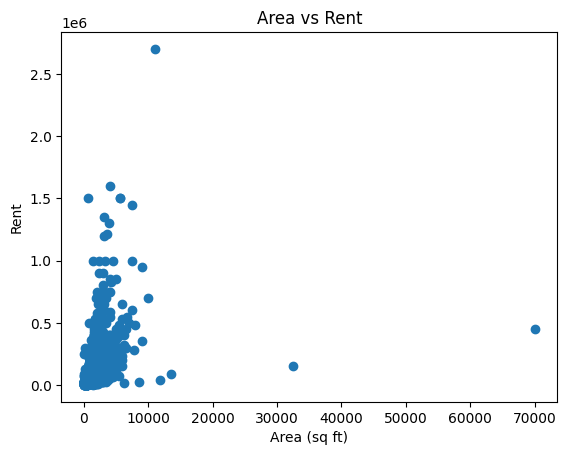

In [19]:
plt.scatter(df['area'], df['rent'])
plt.title("Area vs Rent")
plt.xlabel("Area (sq ft)")
plt.ylabel("Rent")
plt.show()
